In [1]:
import math
import numpy as np
import pandas as pd
from scipy.io import loadmat
from pytictoc import TicToc
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from EEG import EEG

In [2]:
em = {}
sn = 1
dRoot = 'Data/'
eRoot = 'EEG/'
bRoot = 'Behavior/'


In [3]:
times = np.array([range(-500, 1249, 4)])  # timepoints of interest (range:exclusive)
# Get position bin index from behavior file
fName = f'../{dRoot}{sn}_Behavior'
behaviorFile = loadmat(fName)

posBin = behaviorFile['ind']['cueBin'][0][0].transpose()
# Data from posBin: posBin[x, 0] where 0 <= x <= 1367
em["posBin"] = posBin  # add to fm structure so it's saved

# Get EEG Data
fName = f'../{eRoot}{sn}_EEG'
eegFile = loadmat(fName)

# Data from eeg_data: eeg_data[x, y, z]
# where 0 <= x <= 1267; 0 <= y <= 21; 0 <= z <= 687
eeg_data = eegFile['eeg']['data'][0][0]

# Data from eegs: eegs[x, y, z]
# where 0 <= x <= 1267; 0 <= y <= 19; 0 <= z <= 687
eegs = eeg_data[:, 0:20, :]  # get scalp EEG (drop EOG electrodes)

nt_artInd = eegFile['eeg']['arf'][0][0]['artIndCleaned'][0][0]
artInd = nt_artInd.transpose()  # grab artifact rejection index
# Data from artInd: artInd[x, 0] where 0 <= x <= 1367

# Data from tois and toisRange: toisRange[0, x] where 0 <= x <= 687
toisRange = np.array([np.arange(int(eegFile['eeg']['preTime']),
                                int(eegFile['eeg']['postTime'] + 1), 4)])
tois = 1 * np.isin(toisRange, times)
nTimes = tois.size  # index time points for analysis.

# Remove rejected trials
not_artInd = 1 - artInd  # not_artInd[x, 0] where 0<=x<=1367

# Data from eegs: eegs[x, y, x] where 0<=x<=1198 0<=y<=19 0<=z<=687
eegs = eegs[(not_artInd.transpose()[0] == 1), :, :]

# Data from posBin: posBin[x, 0] where 0 <= x <= 1198
posBin = posBin[(not_artInd.transpose()[0] == 1)]
nTrials = posBin.size  # No. of good trials
em["nTrials"] = nTrials


[Text(0.5, 1.0, 'Location = [5]')]

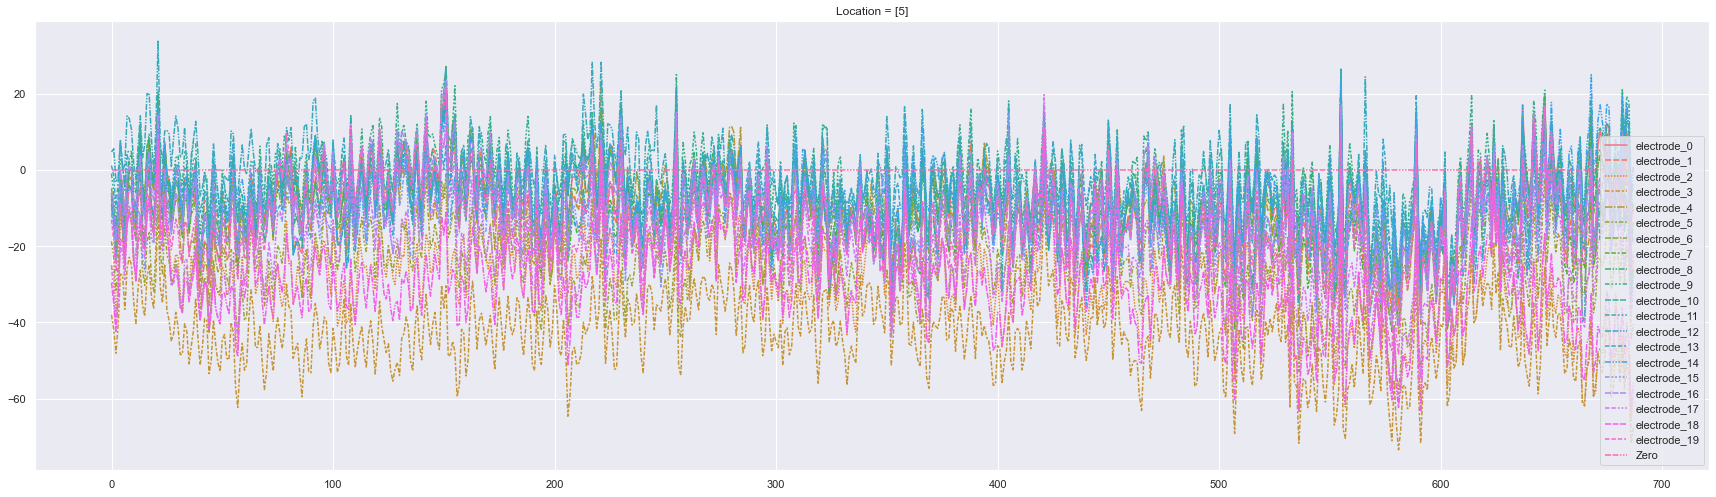

In [4]:
trial_number = 11

electrode_number = 7
trial_data = eegs[trial_number][:][:]
columns = [f'electrode_{i}' for i in range(trial_data.shape[0])]

data = pd.DataFrame(trial_data.transpose(), columns=columns)

data['Zero'] = np.zeros(trial_data.shape[1])

sns.set(rc={'figure.figsize':(30,8.27)})
sns.lineplot(data=data).set(title=f'Location = {posBin[trial_number-1]}')


[Text(0.5, 1.0, 'Location = [5]')]

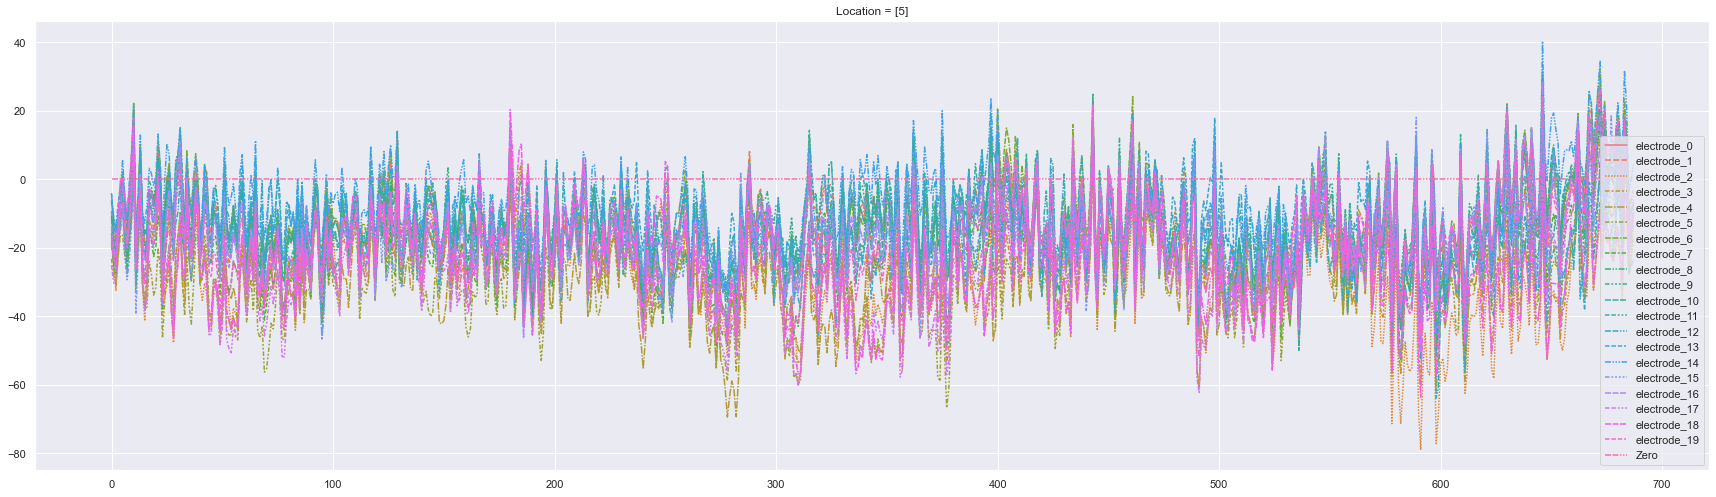

In [5]:
trial_number = 18

electrode_number = 7
trial_data = eegs[trial_number][:][:]
columns = [f'electrode_{i}' for i in range(trial_data.shape[0])]

data = pd.DataFrame(trial_data.transpose(), columns=columns)

data['Zero'] = np.zeros(trial_data.shape[1])

sns.set(rc={'figure.figsize':(30,8.27)})
sns.lineplot(data=data).set(title=f'Location = {posBin[trial_number-1]}')

AVERAGING OVER DIFFERENT POSITIONS TO SEE IF THERE IS ANY PREDITABILITY TO ALPHA POWER

In [5]:
import math
import numpy as np
import pandas as pd
from scipy.io import loadmat
from pytictoc import TicToc
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#averaging the eegs to see if there is actually anything to predict here
sn = 1
electrode = 2
bin_number = 3

#get the filtered data
filtered_data_file = loadmat(f'../EEG_filtered/{sn}_EEGfilt.mat')
eeg_data_filtered = filtered_data_file['eeg']['data'][0][0]

#get the behaviour data
behaviorFile = loadmat(f'../Data/{sn}_Behavior')
posBin = behaviorFile['ind']['cueBin'][0][0].transpose()

#get the artifact data
eegFile = loadmat('../EEG/1_EEG.mat')
eeg_data = eegFile['eeg']['data'][0][0]

nt_artInd = eegFile['eeg']['arf'][0][0]['artIndCleaned'][0][0]
artInd = nt_artInd.transpose()

not_artInd = 1 - artInd

eeg_data_filtered = eeg_data_filtered[(not_artInd.transpose()[0] == 1), :, :]
#eegs = eeg_data[(not_artInd.transpose()[0] == 1), :, :]

posBin = posBin[(not_artInd.transpose()[0] == 1)]
nTrials = posBin.size  # No. of good trials


[Text(0.5, 1.0, 'Position of bin = [7]')]

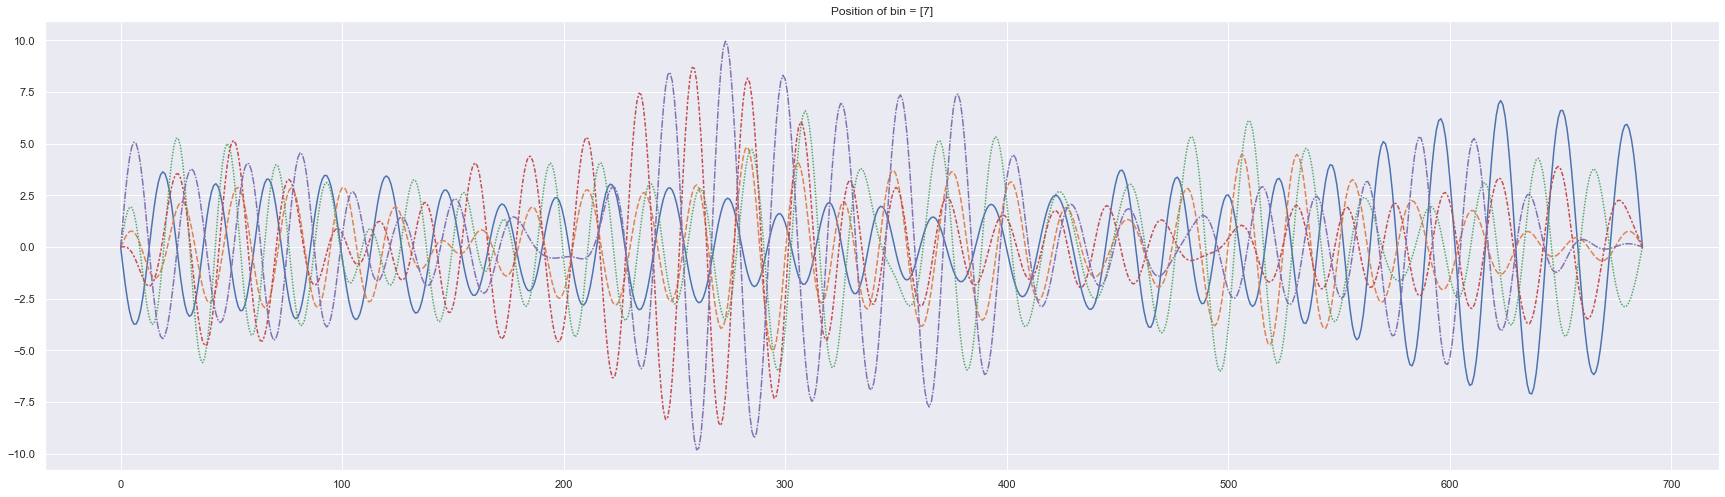

In [8]:
trial_number = 3
sns.set(rc={'figure.figsize':(30,8.27)})
sns.lineplot(data=eeg_data_filtered[(posBin==bin_number).transpose()[0], electrode, :].transpose()[:, :5], legend=False).set(title=f'Position of bin = {posBin[trial_number-1]}')

<AxesSubplot:xlabel='Time', ylabel='value'>

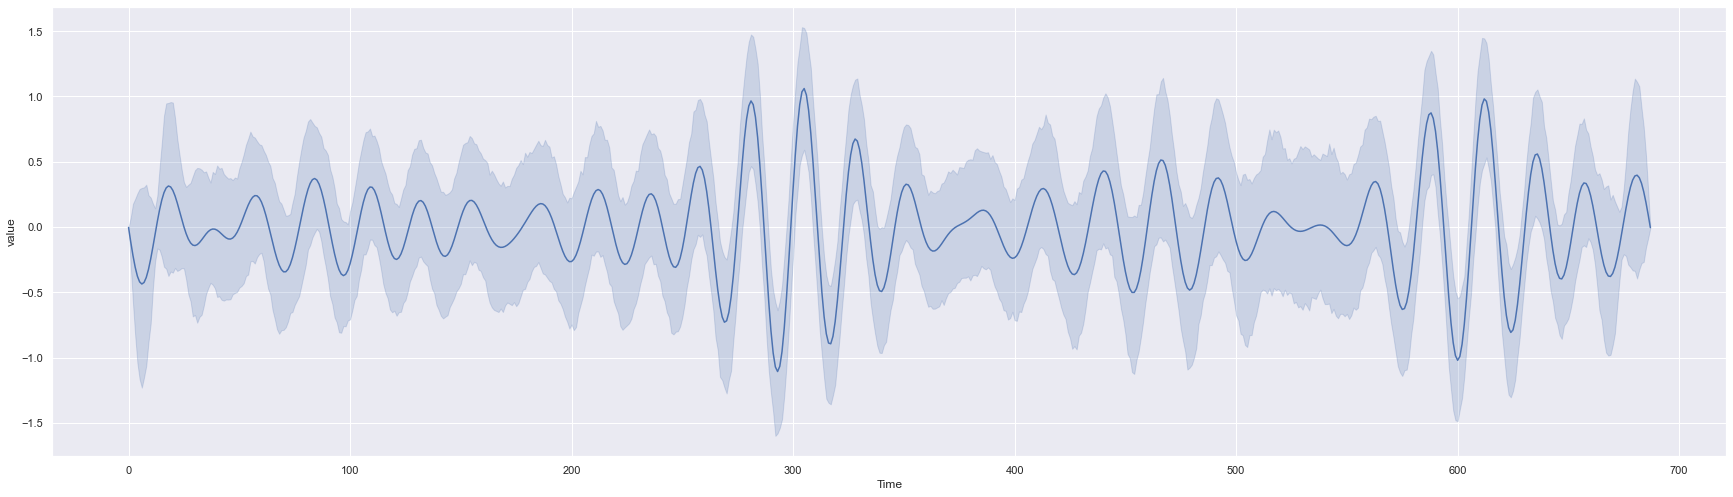

In [10]:
bin_specific_trials = eeg_data_filtered[(posBin==bin_number).transpose()[0], :, :]
electrode_specific_data = bin_specific_trials[:, electrode,:]

columns = [i for i in range(len(bin_specific_trials))]

df = pd.DataFrame(electrode_specific_data.transpose(), columns=columns)
df['Time'] = [i for i in range(688)]
df = pd.melt(df, id_vars='Time')


sns.lineplot(data=df, x="Time", y="value", ci=95)

<AxesSubplot:xlabel='Time', ylabel='value'>

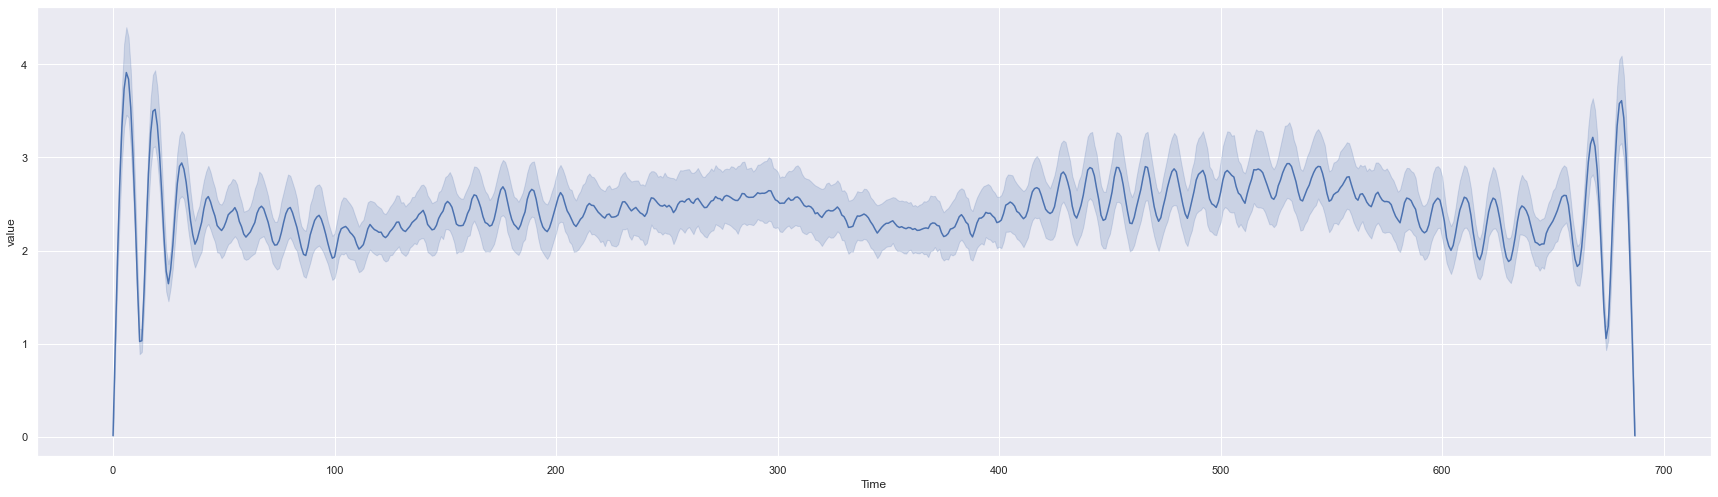

In [11]:
bin_specific_trials = eeg_data_filtered[(posBin==bin_number).transpose()[0], :, :]
electrode_specific_data = np.abs(bin_specific_trials[:, electrode,:])

columns = [i for i in range(len(bin_specific_trials))]

df = pd.DataFrame(electrode_specific_data.transpose(), columns=columns)
df['Time'] = [i for i in range(688)]
df = pd.melt(df, id_vars='Time')


sns.lineplot(data=df, x="Time", y="value", ci=95)

In [74]:
pd.melt(df, id_vars='Time')

c:\Users\priya\miniconda3\envs\test_olympus\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time,variable,value
0,0,variable,0
1,1,variable,0
2,2,variable,0
3,3,variable,0
4,4,variable,0
...,...,...,...
209147,683,value,17.3963
209148,684,value,14.1309
209149,685,value,9.95574
209150,686,value,5.13661


TESTING CLASS EEG AND LOAD BEHAVIOUR FUNCTIONS

In [1]:
import os
import pickle
from scipy.io import loadmat

from EEG import EEG
from behavior import load_posBin

import time

import numpy as np

import pandas as pd
import seaborn as sns

In [45]:
start_time = time.time()
eeg = EEG()
eeg.load('..\\EEG\\2_EEG.mat')
eeg.drop_artifacts()
posBin = load_posBin('..\\data\\2_Behavior.mat')


In [46]:
electrode = 10
bin_number = 2
bin_specific_trials = eeg.eeg_total[(posBin==bin_number).transpose()[0], :, :]
electrode_specific_data = bin_specific_trials[:, electrode,:]

columns = [i for i in range(len(bin_specific_trials))]

df = pd.DataFrame(electrode_specific_data.transpose(), columns=columns)
df['Time'] = [i for i in range(688)]
df = pd.melt(df, id_vars='Time')

sns.set(rc={'figure.figsize':(30,8.27)})
sns.lineplot(data=df, x="Time", y="value", ci=95)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1161 but corresponding boolean dimension is 1440

In [4]:
e = EEG()
e.load('../EEG/1_EEG.mat')


In [11]:
posBin = load_posBin('../data/1_Behavior.mat')

In [6]:
e.drop_artifacts()


(1223, 22, 688)


In [33]:
posBin = load_posBin('../data/1_Behavior.mat')
nt_artInd = e.art.artIndCleaned
artInd = nt_artInd.transpose()

not_artInd = 1 - artInd

p = posBin[(not_artInd.transpose() == 1)]

NameError: name 'trial_number' is not defined

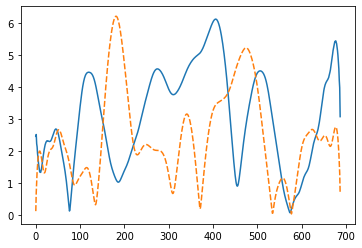

In [40]:
sns.lineplot(data=e.eeg_total[1:3, 0, :].transpose()[:, :5],
                                     legend=False).set(title=f'Position of bin = {posBin[trial_number-1]}')

In [37]:
print(e.eeg_total)

[[[0.02053262 1.38511416 2.30535135 ... 4.38497731 3.49681353 1.93725673]
  [1.10228014 2.13785615 2.73798828 ... 1.83683503 1.20580337 0.2489548 ]
  [0.10611384 2.84577218 4.77966836 ... 9.11422114 7.32869006 4.14213591]
  ...
  [0.58521043 1.97393379 2.88425029 ... 3.76256234 2.8635993  1.37152576]
  [0.66608147 1.98020816 2.80808505 ... 2.91366372 2.17603238 1.00559672]
  [1.49932432 1.22548894 0.9101917  ... 3.83155657 3.44142961 2.45872157]]

 [[2.45342279 2.5109761  2.22107941 ... 4.2106993  3.97104149 3.06922863]
  [4.11157378 4.8150905  4.70391005 ... 4.85358875 4.87338744 4.1128917 ]
  [2.51034309 3.70987424 4.23295475 ... 0.74065135 0.8969575  1.27156473]
  ...
  [2.9586494  3.39264306 3.25585542 ... 3.7782541  3.73582565 3.08368756]
  [1.89840999 2.02566002 1.85143874 ... 2.96394684 2.84030126 2.24499555]
  [0.62002977 0.46278998 0.4560712  ... 2.07880972 1.81482161 1.22811511]]

 [[0.11629251 0.69501158 1.06901373 ... 1.64776181 1.29865931 0.67909471]
  [2.73829322 2.945576

In [34]:
print(p.shape)

(1199, 1)
